In [14]:
import torch
from torchvision import models
from torchvision import transforms
from PIL import Image

def recognition(img):
    img_t = preprocess(img)
    batch_t = torch.unsqueeze(img_t, 0)
    resnet.eval()
    out = resnet(batch_t)
    with open('./files/imagenet_classes.txt') as f:
        labels = [line.strip() for line in f.readlines()]
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    labels[index[0]], percentage[index[0]].item()
    _, indices = torch.sort(out, descending=True)
    return [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

resnet = models.resnet101(pretrained=True)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224,0.225]
    )])

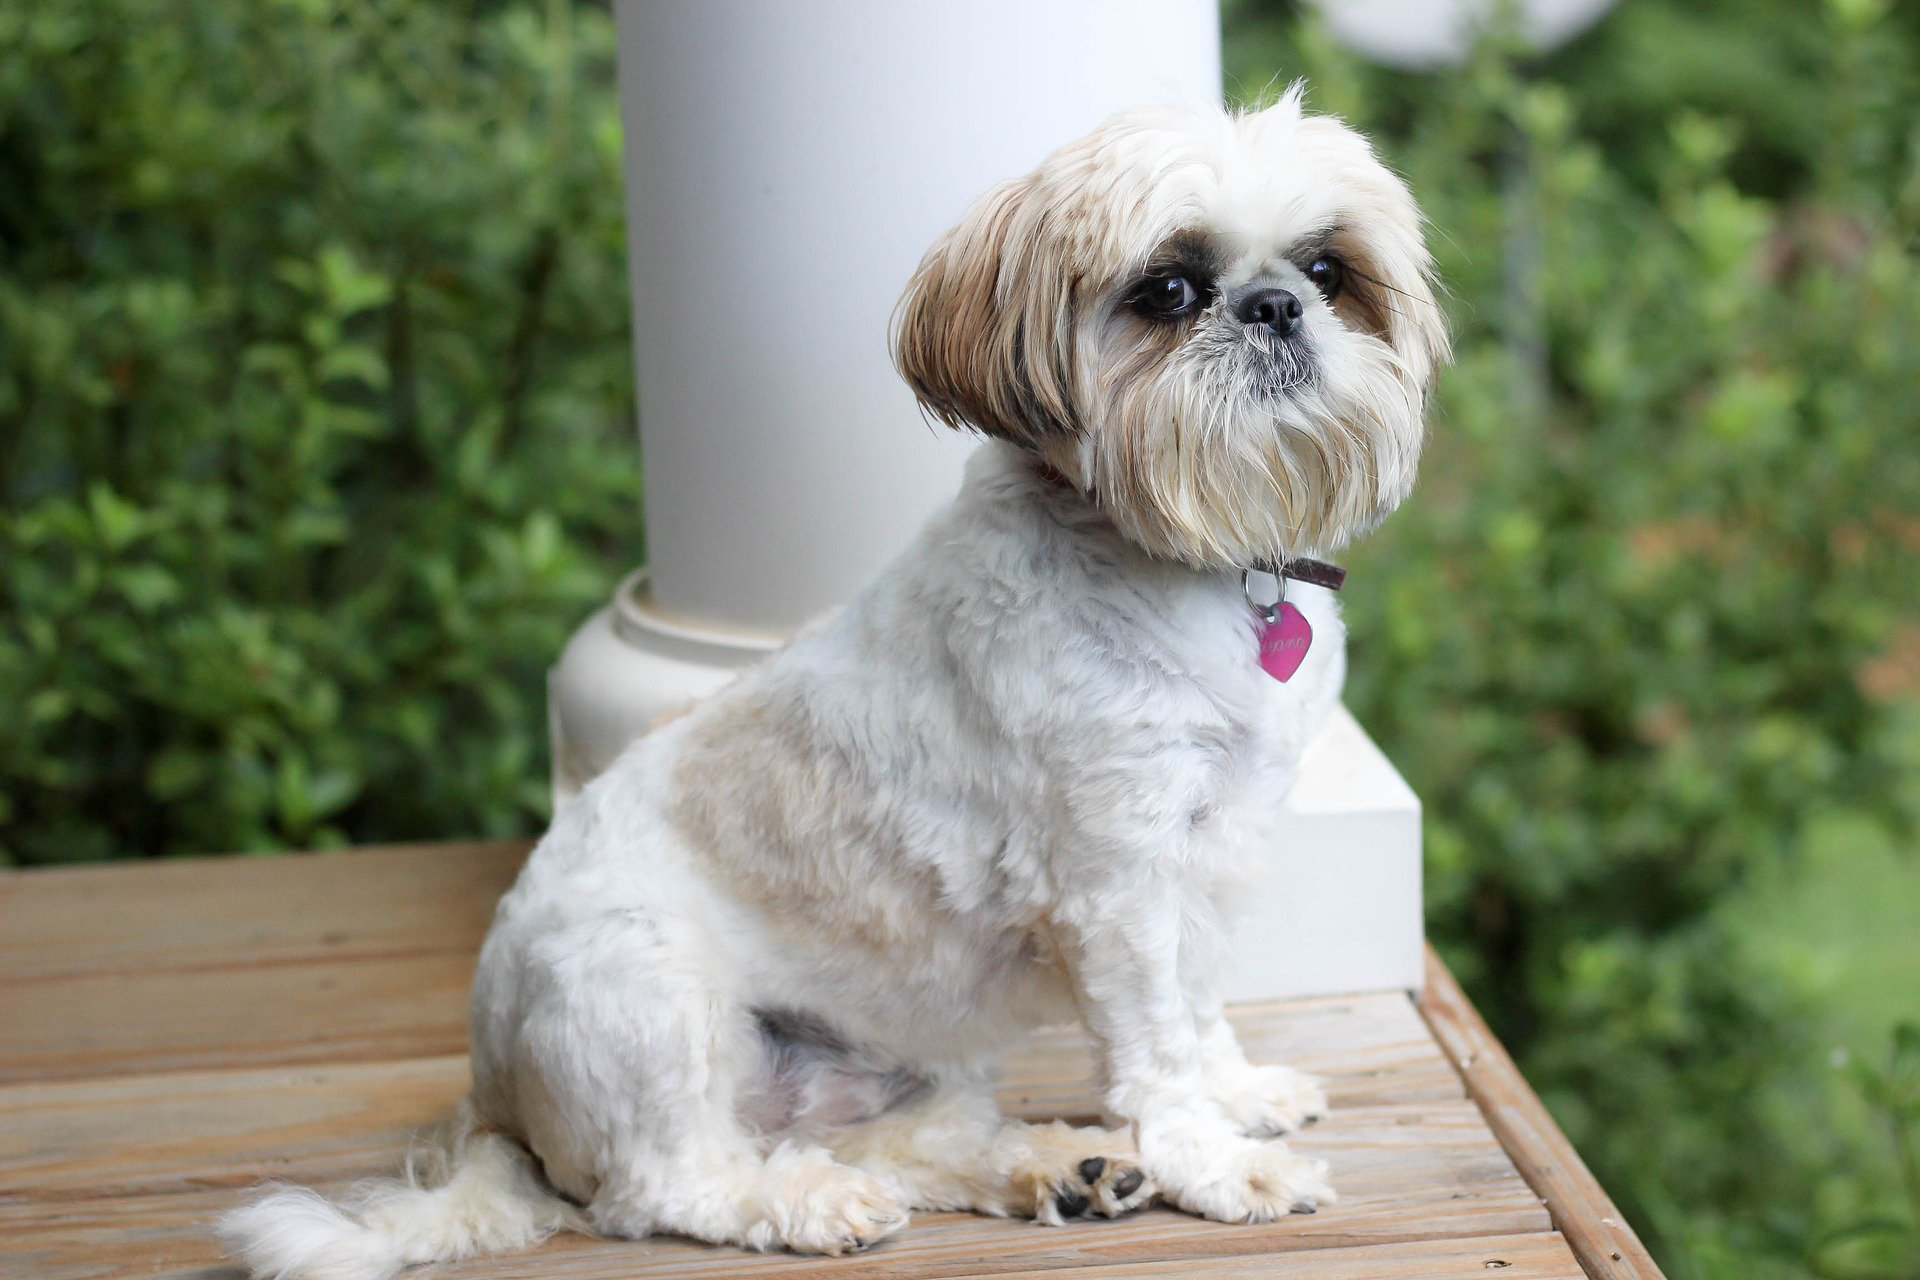

In [15]:
img = Image.open('./img/shih-tzu.jpg')
img

In [3]:
a = recognition(img)
a

[('155, Shih-Tzu', 77.87580871582031),
 ('154, Pekinese', 11.167364120483398),
 ('262, Brabancon_griffon', 3.913360357284546),
 ('204, Lhasa', 2.5925252437591553),
 ('152, Japanese_spaniel', 0.9658402800559998)]

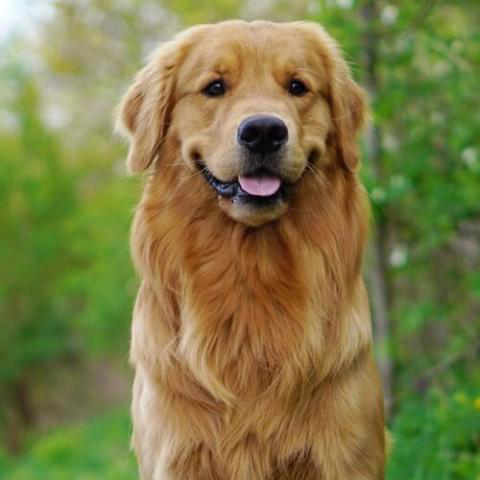

In [4]:
img = Image.open('./img/golden-retriever.jpg')
img

In [5]:
a = recognition(img)
a

[('207, golden_retriever', 87.4775390625),
 ('220, Sussex_spaniel', 3.8504691123962402),
 ('216, clumber', 1.0462777614593506),
 ('244, Tibetan_mastiff', 0.9186632633209229),
 ('255, Leonberg', 0.855021059513092)]

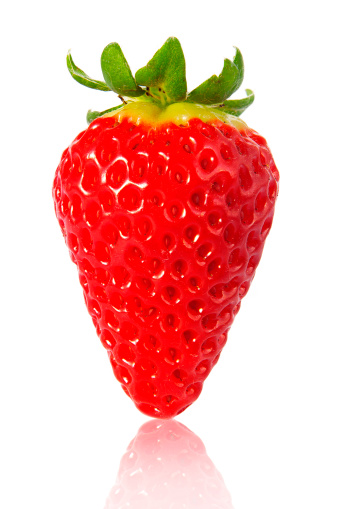

In [7]:
img = Image.open("./img/strawberry.jpg")
img

In [8]:
a = recognition(img)
a

[('949, strawberry', 99.68383026123047),
 ('957, pomegranate', 0.034142717719078064),
 ('503, cocktail_shaker', 0.02145833894610405),
 ('960, chocolate_sauce', 0.01779360882937908),
 ('953, pineapple', 0.015349365770816803)]

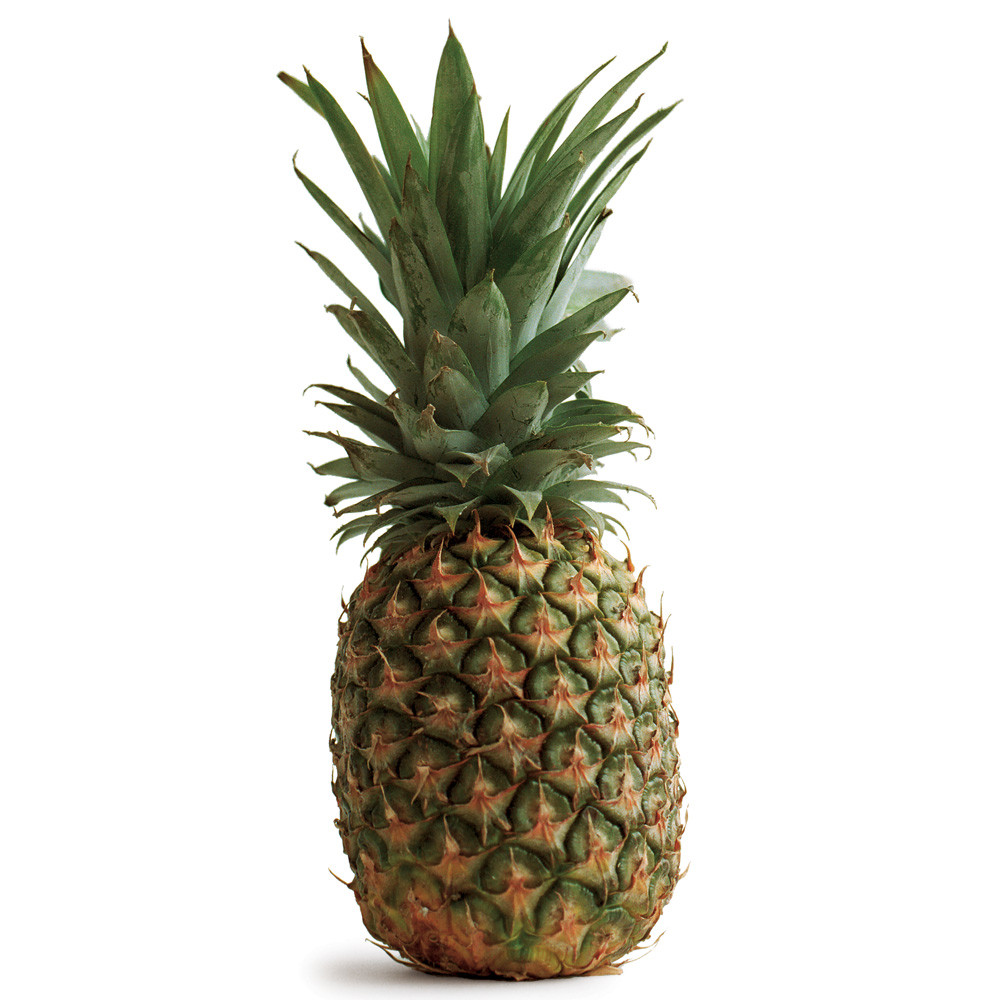

In [9]:
img = Image.open("./img/pineapple.jpg")
img

In [10]:
a = recognition(img)
a

[('953, pineapple', 99.99756622314453),
 ('949, strawberry', 0.0012435493990778923),
 ('954, banana', 0.00039840611862018704),
 ('946, cardoon', 0.00018668128177523613),
 ('956, custard_apple', 0.00013327457418199629)]

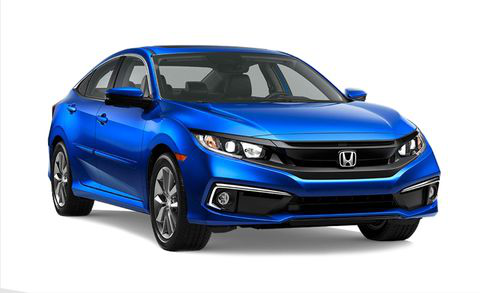

In [12]:
img = Image.open('./img/honda-civic-sedan.jpg')
img

In [13]:
a = recognition(img)
a

[('817, sports_car', 60.427005767822266),
 ('751, racer', 12.580534934997559),
 ('436, beach_wagon', 8.31143569946289),
 ('479, car_wheel', 6.717550754547119),
 ('717, pickup', 5.099795341491699)]